# 07 Integration (Parts 1 and 2)
See *Computational Physics* (Landau, Páez, Bordeianu), Chapter 5.7 - 5.22

These slides include material from  *Computational Physics. eTextBook Python 3rd Edition.* Copyright © 2012 Landau, Rubin, Páez. Used under the Creative-Commons Attribution-NonCommerical-ShareAlike 3.0 Unported License.


## Integral as a Riemann sum
Numerical integration (also called *quadrature*) is based on the [Riemann definition of an integral](http://mathworld.wolfram.com/RiemannIntegral.html)

$$
\int_a^b \!\!\!f(x)\, dx :=
   \lim_{h\rightarrow 0} \left( h \sum_{i=1}^{(b-a)/h} f(x_i) \right)
$$

![Riemann sum. (Based on a figure © 2012 Landau, Páez, Bordeianu, used under CC-BY-NC-SA 3.0 license and licensed under the same](./images/CompPhys2012_Riemann.png)

## Basic integration algorithm

$$
I_h = h \sum_{i=1}^{(b-a)/h} f(x_i) \approx \int_a^b f(x)\, dx
$$

* sum rectangles of width $h$ and height $f(x_i)$
* more advanced methods just refine this approach (except Monte Carlo... see later)
* *remove singularities* before numerical integration!

##  Thinking about errors

What factors will influence the total error?

* width $h$ of intervals determines number $N = (b - a)/h$ of summation steps
* smaller $h$ will increase accuracy
* larger $N$ will increase round-off error

## Problem: Integrate $\cos x$ over $-\pi/2 \leq x \leq \pi/2$

**Write a function** `integrate_simple(f, a, b, N)` that computes the integral $\int_a^b f(x) dx$ using the simple Riemann sum 

$$
I_h = h \sum_{i=1}^{(b-a)/h} f(x_i) \quad\text{with}\quad h = \frac{b-a}{N-1}.
$$

with $N$ points across the integration region $[a, b]$. Note: Each endpoint should only enter the sum with half its weight.

**Apply your function** to $\int_{-\pi/2}^{\pi/2} \cos x dx$.

**Compare to your analytical solution** for a range of $N$ values.

In [3]:
import numpy as np

def integrate_simple(f, a, b, N):
    """Integrate function `f` from `a` to `b` with `N` points."""
    # implement
    
# test: answer should be close to the analytical value ___
integrate_simple(np.cos, -np.pi/2, np.pi/2, 100)

#### Additional Challenges
1. Numerically calculate the integral $\int_0^x \cos t\, dt$ and plot for $-2\pi \leq x \leq 2\pi$.
2. Write the integration function without a single `for` loop but **only use numpy array operations**.
3. Benchmark your implementations (pure Python vs numpy using `%timeit` in the notebook). Which one is faster for $N = {10, 100, 10^6}$?
4. Error analysis for $1 < N \leq 10^7$.

### Pair Programming 

We will try a software engineering technique called [pair programming](http://guide.agilealliance.org/guide/pairing.html) (borrowed from agile/[extreme programming](http://www.extremeprogramming.org/))
1. Split into teams of 2. (Be nice. Introduce yourselves.) 
2. Sit next to each other at one desk.
3. Decide whose laptop you are going to use.
4. [Flip a coin](https://www.random.org/coins/?num=1&cur=60-usd.0100c-washington) to decide who will start out as the *navigator* and who will be the *driver*.
5. Roles:
   - *driver*: keyboard & types
   - *navigator* reads code, provides directions, catches bugs
   - *Both* constantly talk to each other: comment on what you're typing, comment on what is being typed
6. Switch roles every ~5 minutes

### Solution 

In [131]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("ggplot")

In [132]:
def integrate_simple(f, a, b, N):
    """Integrate function `f` from `a` to `b` with `N` points."""
    h = (b - a)/(N-1)
    Ih = (f(a) + f(b))/2    # include endpoints with weight 1/2
    for i in range(1, N-1):  # points inside interval
        Ih += f(a + i*h)
    Ih *= h
    return Ih

In [133]:
integrate_simple(np.cos, -np.pi/2, np.pi/2, 100)

1.9998321638939927

This is close to the exact result of 2:

In [69]:
def print_integration_error(N):
    exact = 2
    abserror = exact - integrate_simple(np.cos, -np.pi/2, np.pi/2, N)
    print("{0:6g}   {1:10g}    {2:10g}".format(N, abserror, abserror/exact))

for N in (2, 10, 100, 1000, 10**4, 10**6, 10**7):
    print_integration_error(N)

     2            2             1
    10    0.0203492     0.0101746
   100   0.000167836    8.39181e-05
  1000   1.64823e-06    8.24115e-07
 10000   1.64526e-08    8.22631e-09
 1e+06   1.57985e-12    7.89924e-13
 1e+07   1.7053e-13    8.52651e-14


#### Plot the integral function

$$
I(x) = \int_0^x \cos t dt
$$


* Compute the integral analytically
* Plot the numerical and the analytical solution together

In [134]:
X = np.pi*np.linspace(-2, 2, 100)
Ix = integrate_simple(np.cos, 0, X, 1000)
abs_err = Ix - np.sin(X)
rel_err = np.abs(abs_err/np.sin(X))

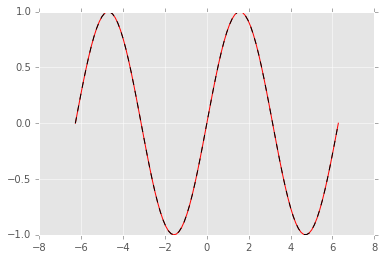

In [135]:
plt.plot(X, Ix, 'r-', label="integrate_simple()")
plt.plot(X, np.sin(X), 'k--', label=r"$\sin x")

##### Relative error of the integral function 

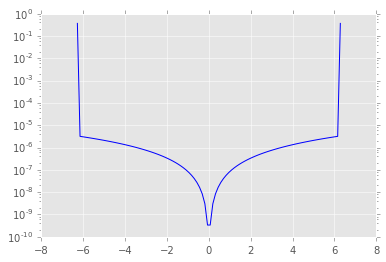

In [136]:
plt.semilogy(X, rel_err, 'b-')

What happens near/at $\pm2\pi$? 

In [143]:
integrate_simple_np(np.cos, 0, 2*np.pi, 10**3)

-7.150304988910588e-16

(1) We don't get exact $2\pi$ for our last $x$ (limited precision!) and thus the exact result is not exactly zero and (2) the relative error is two tiny numbers divided by each other and thus becomes large:

In [146]:
print("last x = ", X[-1])
print("exact integral ", np.sin(X[-1]))
print("numerical integral", integrate_simple_np(np.cos, 0, 2*np.pi, 10**3))
print("relative error", rel_err[-1])

last x =  6.28318530718
exact integral  -2.44929359829e-16
numerical integral -7.15030498891e-16
relative error 0.364246696397


#### Solution using numpy
Note that the loop is replaced by a function evaluation over all intervals, followed by adjustment of the endpoints, and a final numpy sum:

In [137]:
import numpy as np

def integrate_simple_np(f, a, b, N):
    """Integrate function `f` from `a` to `b` with `N` points."""
    h = (b - a)/(N-1)
    xi = np.linspace(a, b, N)    # all interval points
    fi = f(xi)                   # all function evaluations
    fi[[0, -1]] /= 2    # include endpoints with weight 1/2
    return h * fi.sum()

In [138]:
integrate_simple_np(np.cos, -np.pi/2, np.pi/2, 100)

1.9998321638939927

In [139]:
integrate_simple_np(np.cos, -np.pi/2, np.pi/2, 10**8)

2.0000000000000009

Both solutions give identical answers:

In [154]:
integrate_simple_np(np.cos, -np.pi/2, np.pi/2, 100) - integrate_simple(np.cos, -np.pi/2, np.pi/2, 100)

0.0

##### Relative error of the numpy solution
The numpy solution is much faster (see below) so we can use more intervals!

In [140]:
X = np.pi * np.linspace(-2, 2, 100)
Ix_np = np.array([integrate_simple_np(np.cos, 0, x, 10**6) for x in X])
abs_err_np = Ix_np - np.sin(X)
rel_err_np = np.abs(abs_err_np/np.sin(X))

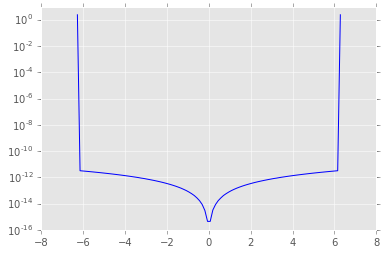

In [141]:
plt.semilogy(X, rel_err_np, 'b-')

In [142]:
integrate_simple_np(np.cos, 0, 2*np.pi, 10**6)

-8.2789245575897814e-16

#### Benchmarking
Which solution is faster? Try both the Python loop and the NumPy version for
* $N = 10$
* $N = 100$
* $N = 10^6$

##### N = 10

In [58]:
%timeit integrate_simple(np.cos, -np.pi/2, np.pi/2, 10)

10000 loops, best of 3: 28 µs per loop


In [59]:
%timeit integrate_simple_np(np.cos, -np.pi/2, np.pi/2, 10)

10000 loops, best of 3: 49 µs per loop


For $N=10$ points, the naive Python implementation is almost twice as fast.

##### N = 100 

In [60]:
%timeit integrate_simple(np.cos, -np.pi/2, np.pi/2, 100)

1000 loops, best of 3: 251 µs per loop


In [62]:
%timeit integrate_simple_np(np.cos, -np.pi/2, np.pi/2, 100)

10000 loops, best of 3: 51.6 µs per loop


For 100 points, the numpy version is about 5 times faster than the Python loop.

##### N = 10**6

In [48]:
%timeit integrate_simple(np.cos, -np.pi/2, np.pi/2, 10**6)

1 loops, best of 3: 2.51 s per loop


In [47]:
%timeit integrate_simple_np(np.cos, -np.pi/2, np.pi/2, 10**6)

10 loops, best of 3: 37.4 ms per loop


In [53]:
2.51 / 37.4e-3

67.11229946524062

For 1 Million points, the numpy version is about 67 times faster than the pure-python implementation.

Lesson: **Replace Python loops with NumPy array operations!**

#### Error analysis
Exact solution:
$$
\int_{-\pi/2}^{+\pi/2} \cos x dx = [\sin x]_{-\pi/2}^{+\pi/2} = 1 - (-1) = 2
$$

In [148]:
def integral_cos(a, b):
    """Integral cos x from a to b"""
    return np.sin(b) - np.sin(a)
    
def abs_error(F, a, b, N):
    """Absolute error for integrating cos x from a to b with algorithm F"""
    return np.abs(F(np.cos, a, b, N) - integral_cos(a, b))

def rel_error(F, a, b, N):
    """relative error for integrating cos x from a to b with algorithm F"""
    exact = integral_cos(a, b)
    return np.abs(F(np.cos, -np.pi/2, np.pi/2, N) - exact)/np.abs(exact)  
    

In [149]:
integral_cos(-np.pi/2, np.pi/2)

2.0

In [150]:
abs_error(integrate_simple_np, -np.pi/2, np.pi/2, 100)

0.00016783610600734633

In [151]:
rel_error(integrate_simple_np, -np.pi/2, np.pi/2, int(1e6))

8.22675261247241e-13

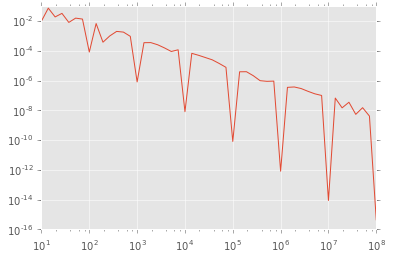

In [152]:
N_range = np.logspace(1, 8, 50)  # 10 -> 10**8
errors = np.array([rel_error(integrate_simple_np, -np.pi/2, np.pi/2, N) for N in N_range])
plt.loglog(N_range, errors)